## GRIPTask - 1 : Prediction using Supervised ML

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Author: SHASHANK INDORKAR



**IMPORTING THE LIBRARY**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

**IMPORTING THE DATA**

In [2]:
# Reading data from remote link
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**FINDING CORRELATION BETWEEN TWO VARIABLES**

<AxesSubplot:>

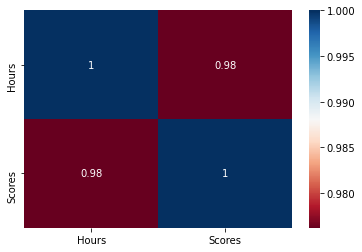

In [7]:
sns.heatmap(data.corr(), annot=True,cmap='RdBu')

NOTE:

 Here the HeatMap shows the positive correlation between Hours and Scores.

The columns with the correlation 1 are the best correlated and vice-versa

**DATA VISUALIZATION**

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

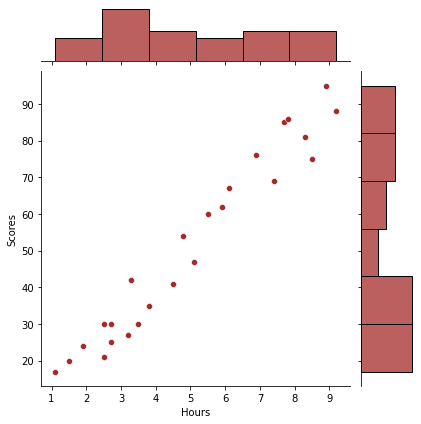

In [8]:
sns.jointplot(x='Hours',y='Scores',data=data,color='brown')

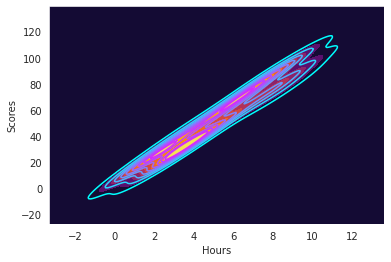

In [47]:
sns.set_style('dark',{"axes.facecolor":"Black"})
sns.kdeplot(x='Hours',y='Scores',data=data,shade=True,thresh=0,cmap='inferno')
sns.kdeplot(x='Hours',y='Scores',data=data,cmap='cool')
plt.show()

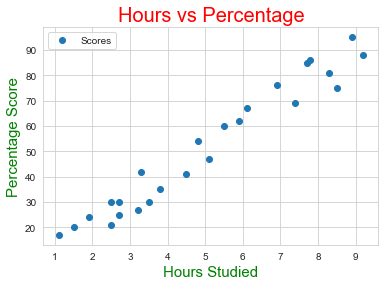

In [9]:
# Plotting the distribution of scores
sns.set_style('whitegrid')
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage',fontsize=20,color='r')  
plt.xlabel('Hours Studied',fontsize=15,color='g')  
plt.ylabel('Percentage Score',fontsize=15,color='g')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

 **PREPARING THE DATA**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, 1]

**TRAINING THE DATA** 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

 **TRAINING THE ALGORITHM**
 
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


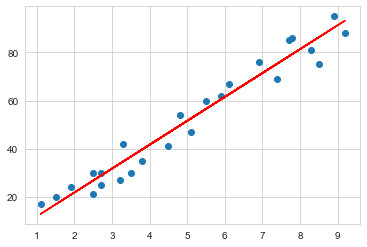

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,'r');
plt.show()

 **MAKING PREDICTIONS**
 
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
# You can also test with your own data

hours = 9.25
own_pred = regressor.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737538


**THUS THE PREDICTED SCORE FOR A STUDENT STUDYING FOR 9.25 HOURS PER DAY IS 93.692**

**EVALUATING THE MODEL**


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error,mean absolute error and r squared score for the test data.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test, y_pred))
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
R_Squared score(test): 0.9454906892105356


### **THANK YOU**

